In [11]:
import requests
import os
from dotenv import load_dotenv
import pandas as pd

In [12]:
env_file = 'env_vars_dgroner_ws.env'
load_dotenv(env_file)
myAPIKey = os.getenv('ALPHAVANTAGE_KEY')
print(myAPIKey)

1XKSGV3DH1BSDSS0


In [18]:
symbols = ['XLE', 'XLB', 'XLI', 'XLY', 'XLP', 'XLV', 'XLF', 'XLK', 'XLC', 'XLU', 'XLRE', '^GSPC']
API_URL = "https://www.alphavantage.co/query"

def GetData(symbol, myAPIKEY, API_URL):
    data = {
        "function": "TIME_SERIES_DAILY",
        "symbol": symbol,
        "interval": "Daily",
        "datatype": "json",
        "apikey": myAPIKey
             }
    resultList = []
    response = requests.get(API_URL,  data)
    data = response.json()
    data = data['Time Series (Daily)']
    return data

In [21]:
data_XLE = GetData("XLE", myAPIKey, API_URL)
data_XLB = GetData("XLB", myAPIKey, API_URL)
data_XLI = GetData("XLI", myAPIKey, API_URL)
data_XLY = GetData("XLY", myAPIKey, API_URL)

In [22]:
data_XLP = GetData("XLP", myAPIKey, API_URL)
data_XLV = GetData("XLV", myAPIKey, API_URL)
data_XLF = GetData("XLF", myAPIKey, API_URL)
data_XLK = GetData("XLK", myAPIKey, API_URL)

In [23]:
data_XLC = GetData("XLC", myAPIKey, API_URL)
data_XLU = GetData("XLU", myAPIKey, API_URL)
data_XLRE = GetData("XLRE", myAPIKey, API_URL)
data_SP500 = GetData("^GSPC", myAPIKey, API_URL)

DataList = [data_XLE,data_XLB,data_XLI,data_XLY,data_XLP,data_XLV,data_XLF,data_XLK,data_XLC,data_XLU,data_XLRE,data_SP500]
myDict = dict(zip(symbols, DataList))

In [24]:
# consolidate the data into a pandas dataframe
# reset index to datetime

def ConsolidateData(data):
    # consolidate the data into a dataframe
    df = pd.DataFrame(data).transpose()
    # reset the index to Datetime
    df.index = pd.to_datetime(df.index)
    # name index column
    df.index.name = "Date"
    # convert str to numeric
    df["4. close"] = df["4. close"].astype("float")
    return df

df_list = []
for key in myDict:
    df_key = ConsolidateData(myDict[key])
    df_list.append(df_key)
    
df_dict = dict(zip(symbols,df_list))
df_SP500 = df_dict.popitem()
df_SP500


('^GSPC',               1. open    2. high     3. low   4. close   5. volume
 Date                                                              
 2020-04-27  2854.6499  2887.7200  2852.8899  2878.4800  2795944244
 2020-04-24  2812.6399  2842.7100  2791.7600  2836.7400  5374480000
 2020-04-23  2810.4199  2844.8999  2794.2600  2797.8000  5756520000
 2020-04-22  2787.8899  2815.1001  2775.9500  2799.3101  5049660000
 2020-04-21  2784.8101  2785.5400  2727.1001  2736.5601  5075830000
 ...               ...        ...        ...        ...         ...
 2019-12-09  3141.8601  3148.8701  3135.4600  3135.9600  3345990000
 2019-12-06  3134.6201  3150.6001  3134.6201  3145.9099  3479480000
 2019-12-05  3119.2100  3119.4500  3103.7600  3117.4299  3355750000
 2019-12-04  3103.5000  3119.3799  3102.5300  3112.7600  3695030000
 2019-12-03  3087.4099  3094.9700  3070.3301  3093.2000  3653390000
 
 [100 rows x 5 columns])

C:\Users\NickZ75\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


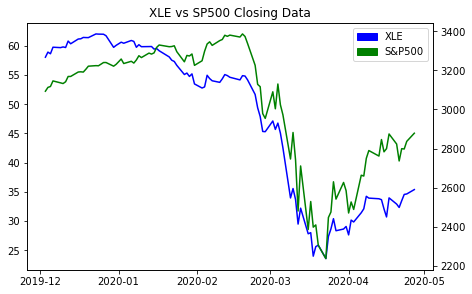

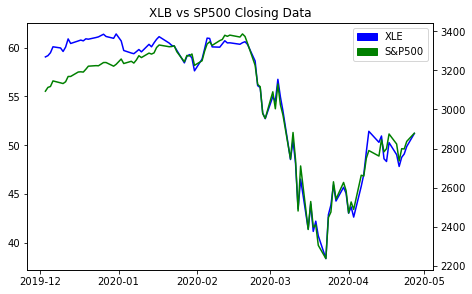

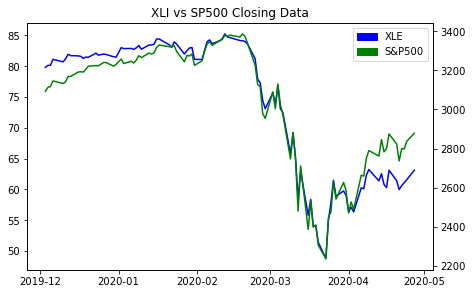

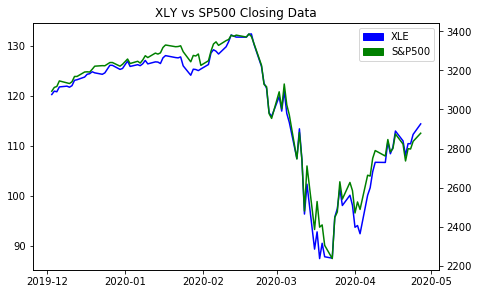

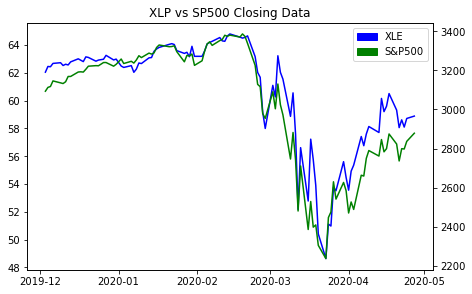

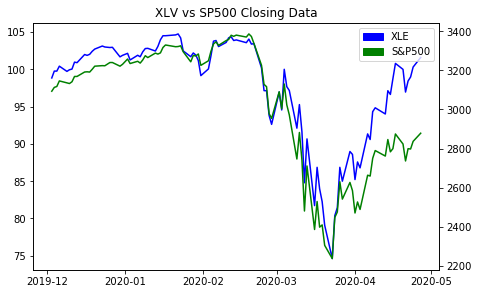

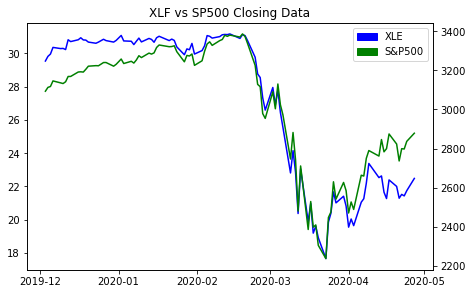

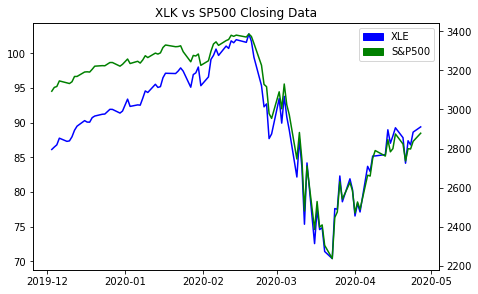

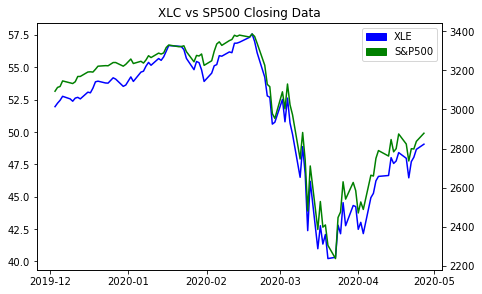

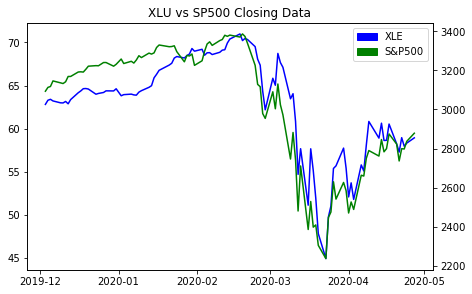

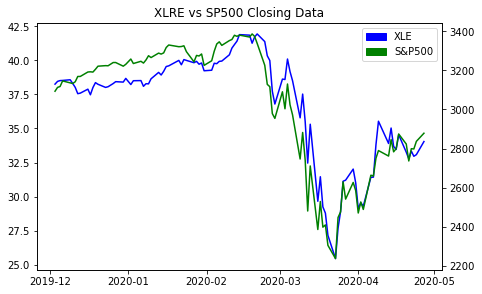

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

for key in df_dict:
    plt.figure(figsize=(16,10)) 

    # ax1 is the twin axis of ax0
    ax0 = plt.subplot(221)
    ax1 = ax0.twinx()   # twinx to share y

    ax0.plot("4. close", data=df_dict[key], c='b')
    ax1.plot("4. close", data=df_SP500[1], c='g')

    # set date title
    plt.title(key + " vs SP500 Closing Data")

    # customize legend
    key = mpatches.Patch(color='blue', label="XLE")
    SP500 = mpatches.Patch(color='green', label='S&P500')
    plt.legend(handles=[key, SP500])

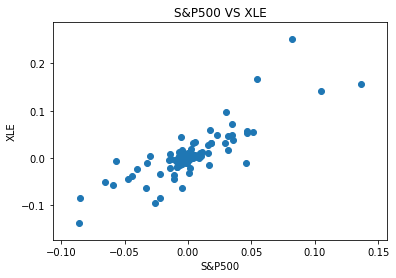

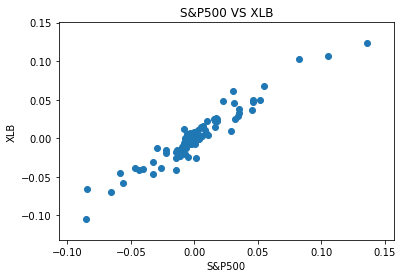

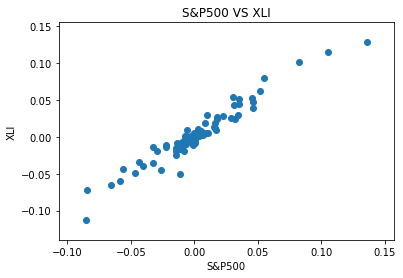

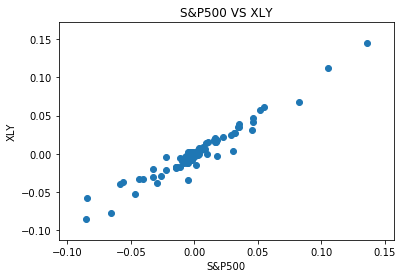

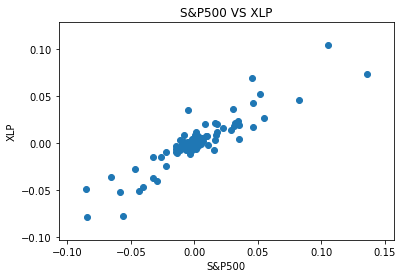

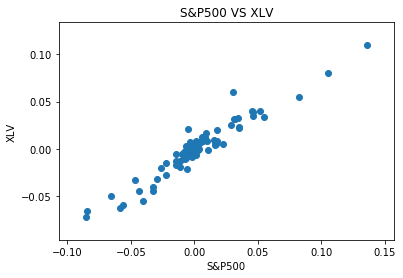

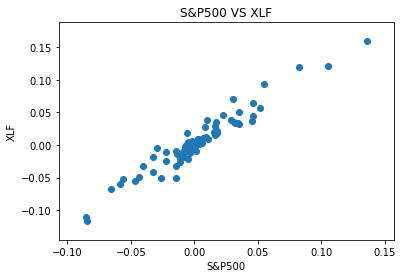

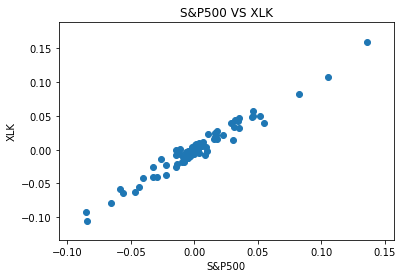

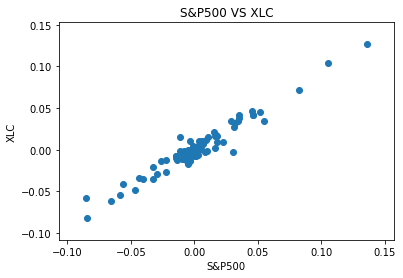

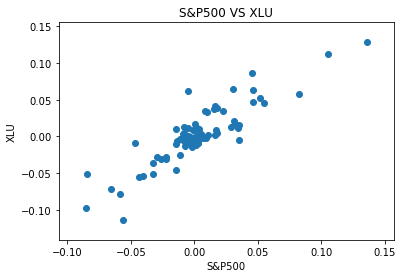

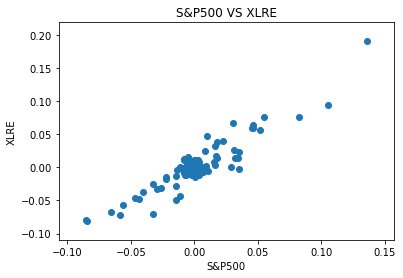

In [26]:
# calculate daily return data for each sector and the S&P500
SP500_return = df_SP500[1]["4. close"].pct_change()[1:]

def Scatter(return_data):
    return(plt.scatter(SP500_return, return_data))

for key in df_dict:
    key_return = df_dict[key]["4. close"].pct_change()[1:]
    fig = plt.figure()
    plt.scatter(SP500_return, key_return)
    plt.title("S&P500 VS " + key)
    plt.xlabel("S&P500")
    plt.ylabel(key)
    plt.show


In [27]:
# calculate correlation between sector and S&P500 daily returns 
import statsmodels.api as sm

def correlation(return_data):
    # regression of sector vs S&P500
    indvars = sm.add_constant(SP500_return)
    model = sm.OLS(return_data, indvars).fit()
    summary = model.summary()
    print(summary)

for key in df_dict:
    print(key)
    key_return = df_dict[key]["4. close"].pct_change()[1:]
    print(correlation(key_return))

XLE
                            OLS Regression Results                            
Dep. Variable:               4. close   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     220.8
Date:                Mon, 27 Apr 2020   Prob (F-statistic):           9.71e-27
Time:                        19:16:52   Log-Likelihood:                 214.70
No. Observations:                  99   AIC:                            -425.4
Df Residuals:                      97   BIC:                            -420.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0046      0.003      1.633     

C:\Users\NickZ75\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



None
XLU
                            OLS Regression Results                            
Dep. Variable:               4. close   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     346.9
Date:                Mon, 27 Apr 2020   Prob (F-statistic):           8.39e-34
Time:                        19:16:52   Log-Likelihood:                 265.92
No. Observations:                  99   AIC:                            -527.8
Df Residuals:                      97   BIC:                            -522.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.783e-05      0.002      0.03